# Introdução ao Python - Capítulo 5 - Análise exploratória de Dados
Vamos utilizar o método de _Exploratory Data Analysis_ para explorar dados do mundo real e obter algumas informações. Os dados que vamos analisar são referentes a **filmes** que receberam **notas** a partir da avaliação de usuários, eles podem ser encontrados no site [MovieLens](https://grouplens.org/datasets/movielens/).

Vamos realizar queries, avaliar a Tendência Central, média, mediana e etc. Aliado a isso vamos procurar entender a distribuição das notas dadas ao filmes por meio de gráficos como histogramas e _boxplots_, que nos permitem fazer comparações entre as grandezas disponíveis. 

Para tudo isso serão utilizadas as principais bibliotecas de Python para análise de dados: Pandas, NumPy, Seaborn, Matplotlib. A visualização de dados será abordada, assim como boas e más práticas.

## 1. Investigação inicial
### 1.1. Notas
Vamos começar pelo arquivo que contém as notas dadas pelos usuários. Vamos carregar o arquivo em formato CSV para um _DataFrame_ e armazená-lo em uma variável chamada `notas_df`, então prosseguimos para uma investigação inicial dos nossos dados:

In [1]:
# antes de tudo, devemos importar a biblioteca Pandas com um apelido
import pandas as pd

In [2]:
# carrega o arquivo de notas (CSV) como um DataFrame
notas_df = pd.read_csv('data/aula5_ratings.csv')

In [3]:
notas_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas_df.shape

(100836, 4)

In [5]:
# altera os rótulos das colunas
notas_df.columns = ['usuario_id', 'filme_id', 'nota', 'instante']

In [6]:
notas_df.columns

Index(['usuario_id', 'filme_id', 'nota', 'instante'], dtype='object')

In [7]:
notas_df.head()

,usuario_id,filme_id,nota,instante
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# notas possiveis, retorna valores unicos na coluna 'nota'
set(notas_df['nota'])

{0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In [9]:
notas_df['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [10]:
# numero de ocorrencias de cada nota
notas_df['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
# média geral das notas
notas_df['nota'].mean()

3.501556983616962

In [12]:
# plotando histograma, um `value_counts()` visual
notas_df.nota.plot(kind='hist')

In [13]:
# mediana
notas_df['nota'].median()

3.5

In [14]:
notas_df.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [15]:
import seaborn as sns

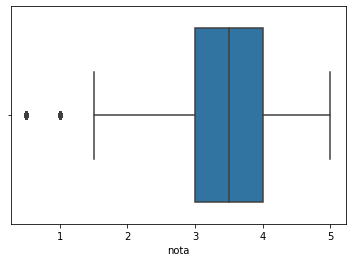

In [16]:
# plotar o `describe()` visual
sns.boxplot(notas_df.nota)

## 2. Avançando para outro DataSet
### 2.1. Filmes
Agora vamos carregar um outro arquivo CSV, desta vez será o arquivo de filmes

In [17]:
filmes_df = pd.read_csv('data/aula5_movies.csv')

In [18]:
print(filmes_df.shape)
filmes_df.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Note que os titulos das colunas estão em inglês, então vamos mudar para português, como foi feito para o primeiro arquivo.

In [19]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 2.2. Notas por filme
Vamos considerar a situação em que queremos saber quais foram as notas dadas para um determinado filme. Se no primeiro arquivo temos as notas para cada `filme_id` e no segundo temos o titulo de cada `filme_id`, devemos fazer a seguinte _query_ para obter, digamos, todas as notas para o filme cujo _id_ é igual a **1**:

In [20]:
notas_filme_um = notas_df.query('filme_id == 1')

In [21]:
print(notas_filme_um.shape)
notas_filme_um.head()

(215, 4)


,usuario_id,filme_id,nota,instante
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Por questão de espaço, foram apresentadas apenas as cinco primeiras linhas do _DataFrame_ resultante da _query_. Note que temos 215 linhas, ou seja, 215 usuários deram alguma nota para o filme de _ID_ igual a **1**. Além disso, todas as outras colunas do _DataFrame_ original também estão presentes neste, como as outras informações (qual usuário e quando) não nos interessam neste momento, podemos especificar apenas a coluna que nos interessa neste momento. Neste caso a query ficaria:

In [22]:
notas_filme_um = notas_df.query('filme_id == 1').nota

In [23]:
notas_filme_um.head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

Agora que sei como obter as notas individuais para um filme específico, posso calcular a média de todas as notas de um filme:

In [24]:
notas_filme_um.mean()

3.9209302325581397

Podemos repetir este processo este processo para o filme cujo _ID_ é igual a **2**, por exemplo.

In [25]:
notas_filme_dois = notas_df.query('filme_id == 2').nota

In [26]:
print(notas_filme_dois.shape)
print(notas_filme_dois.mean())

(110,)
3.4318181818181817


#### 2.2.1. `groupby()`
Perceba que se tivermos que realizar este procedimento para cada um dos filmes, isso se torna inviável. Então vamos começar a trabalhar uma forma de facilitar esta atividade. O primeiro passo será agrupar os dados do _DataFrame_ de notas de acordo com a coluna `filme_id`:

In [27]:
agrupado = notas_df.groupby('filme_id')
agrupado

O resultado disso é que temos um _DataFrame_ agrupado em função dos valores da coluna `filme_id`. O que isso significa exatemente ainda não está claro pra mim... (um dia eu volto aqui pra escrever melhor, ou não).

Mas enfim, agora podemos fazer coisas como essa abaixo, tirar a média dos valores de cada uma das colunas para cada valor da coluna `filme_id`:

In [28]:
agrupado.mean().head()

,usuario_id,nota,instante
filme_id,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08


Note que o _DataFrame_ resultante possui como índice o valor de `filme_id`.

Como estamos interessados em obter a nota média para cada filme, podemos fazer o recorte para a coluna `nota`

In [29]:
media_por_filme = agrupado.mean()['nota']
media_por_filme.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Outra questão que podemos avaliar agora é: _"Todos os filmes receberam a mesma quantidade de avaliações? Se não, quantas avaliações foi feita para cada filme?"_

Basta aplicar o método `count()` no _DataFrame_ agrupado:

In [30]:
agrupado.count().head()

,usuario_id,nota,instante
filme_id,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


Note que todas as colunas possuem o mesmo valor para cada `filme_id`, o que mostra que nosso _DataFrame_ não possui linhas com valores nulos (o que ja deveria ter sido verificado láááá no inicio dessa análise, mas enfim...).

## 3. Visualizando gráficamente
Vamos avaliar como estão distribuídas as médias usando gráficos. Podemos começar plotando um histograma usando Pandas:

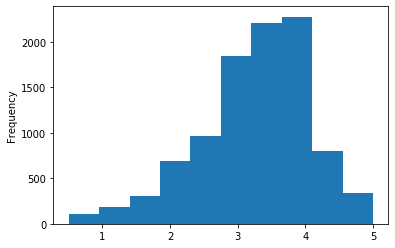

In [31]:
media_por_filme.plot(kind='hist')

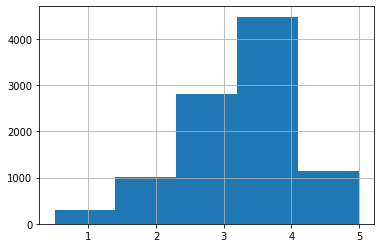

In [32]:
media_por_filme.hist(bins=5)

Podemos fazer um _box plot_ vertical usando Seaborn:

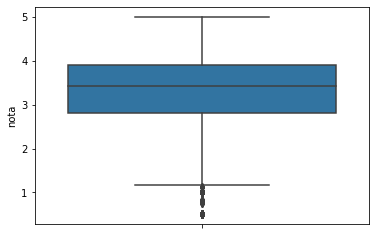

In [33]:
sns.boxplot(y=media_por_filme)

In [34]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Com o Seaborn também é possível fazer histogramas:

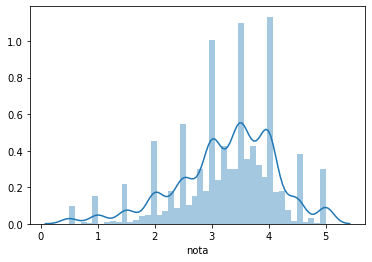

In [35]:
sns.distplot(media_por_filme)

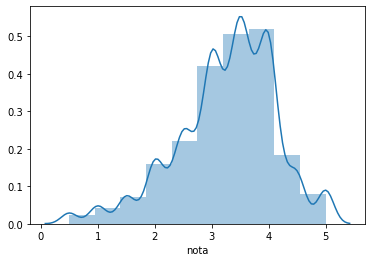

In [36]:
# definindo o mesmo número de intervalos (bins) usando como padrão pelo Pandas
sns.distplot(media_por_filme, bins=10)

### 3.1. Matplotlib

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das Médias dos filmes')

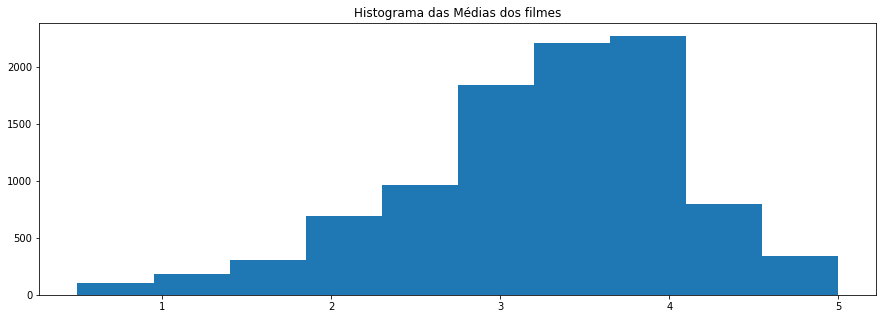

In [38]:
plt.figure(figsize=(15,5))
plt.hist(media_por_filme)
plt.title("Histograma das Médias dos filmes")